## 차량 속도 측정 예제(저주파 통과 필터)
차량 초기속도 : 50m/s
속도 변화 : 평균 0, 표준편차 5, 매 0.1초마다 갱신
잡음 : 평균 0, 표준편차 2kv
$$\bar x_k = \alpha \bar x_{k-1} + (1-\alpha)x_k ,\ \ \ 0 < \alpha < 1$$

In [1]:
# 저주파 통과 필터 구현
from collections import deque

def low_pass_filter(dataList, alpha=0.7):
    lowPassList = []
    prevLowPass = dataList[0]
    for data in dataList:
        xlpf = alpha*prevLowPass + (1-alpha)*data
        lowPassList.append(xlpf)
        prevLowPass = xlpf
        
    return lowPassList

In [29]:
import numpy as np

np.random.seed(2023)

# 속도 데이터 생성
def make_velo_data(Nsamples):
    measVeloData = []
    velo = 50
    dv = np.random.normal(0, 10, Nsamples)
    noise = np.random.normal(0, 2, Nsamples)
    for i in range(Nsamples):
        velo = velo + dv[i]
        measVeloData.append(velo + noise[i])
    return measVeloData

measVeloData = make_velo_data(500)

In [30]:
lowPassFilterData = low_pass_filter(measVeloData)

Text(0, 0.5, 'Velo(m/s)')

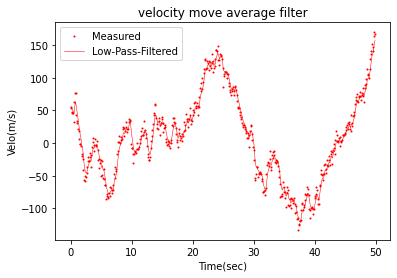

In [31]:
# 데이터 시각화
import matplotlib.pyplot as plt

x_data = [i*0.1 for i in range(500)]
plt.plot(x_data, measVeloData, 'ro', label = 'Measured', markersize=1)
plt.plot(x_data, lowPassFilterData, 'r-', label='Low-Pass-Filtered', linewidth=0.5
)
plt.legend()
plt.title('velocity move average filter')
plt.xlabel('Time(sec)')
plt.ylabel('Velo(m/s)')